In [100]:
import pandas as pd

In [101]:
weather = pd.read_csv("weather_dataset",index_col="DATE")

In [102]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",90.0,100.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",100.0,100.0,NaN,NaN,NaN,0.14,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",50.0,40.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",100.0,100.0,NaN,NaN,NaN,0.86,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",50.0,50.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [103]:
null_pt = weather.apply(pd.isnull).sum()/weather.shape[0]

In [104]:
null_pt

STATION    0.000000
NAME       0.000000
ACMH       0.569428
ACSH       0.569373
AWND       0.183297
FMTM       0.439703
PGTM       0.321047
PRCP       0.000000
SNOW       0.000000
SNWD       0.000111
TAVG       0.624772
TMAX       0.000000
TMIN       0.000000
TSUN       0.998284
WDF1       0.569650
WDF2       0.432453
WDF5       0.437047
WDFG       0.716586
WDFM       0.999945
WESD       0.664398
WSF1       0.569484
WSF2       0.432453
WSF5       0.437102
WSFG       0.586972
WSFM       0.999945
WT01       0.623111
WT02       0.937241
WT03       0.931430
WT04       0.983120
WT05       0.979855
WT06       0.991588
WT07       0.994023
WT08       0.833859
WT09       0.993082
WT11       0.999225
WT13       0.879075
WT14       0.950910
WT15       0.997676
WT16       0.679119
WT17       0.996679
WT18       0.942332
WT19       0.999945
WT21       0.999723
WT22       0.997288
WV01       0.999945
dtype: float64

In [105]:
valid_columns = weather.columns[null_pt<.05]

In [106]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [107]:
weather=weather[valid_columns].copy() #will only contains columns having null value less than 5%

In [108]:
weather.columns = weather.columns.str.lower()

In [109]:
weather = weather.ffill() #will look for missing value and check last non missing value and fill out from there 

In [110]:
weather.apply(pd.isnull).sum() #just checked that all missing value are filled or not

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [111]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

## object datatypes shows string

In [112]:
weather.index

Index(['1975-01-10', '1975-01-11', '1975-01-12', '1975-01-13', '1975-01-14',
       '1975-01-15', '1975-01-16', '1975-01-17', '1975-01-18', '1975-01-19',
       ...
       '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
       '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29'],
      dtype='object', name='DATE', length=18069)

In [113]:
weather.index = pd.to_datetime(weather.index)

In [114]:
weather.index.year

Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=18069)

In [115]:
weather.index.year.value_counts().sort_index()

DATE
1975    356
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    181
Name: count, dtype: int64

<Axes: xlabel='DATE'>

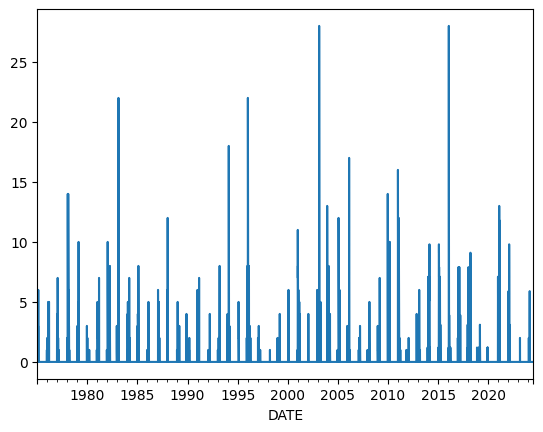

In [116]:
weather["snwd"].plot()

In [117]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,36
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.14,0.0,0.0,59,48
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,42
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,0.0,0.0,43,33
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,34,22
...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70


In [118]:
weather["target"] = weather.shift(-1)["tmax"] #will add another column target which has value equal to tmax of next day

In [119]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,36,59.0
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.14,0.0,0.0,59,48,60.0
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,42,43.0
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,0.0,0.0,43,33,34.0
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,34,22,30.0
...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0


In [120]:
weather = weather.ffill() # to fill up the last row's last column data

In [121]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,36,59.0
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.14,0.0,0.0,59,48,60.0
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,42,43.0
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,0.0,0.0,43,33,34.0
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,34,22,30.0
...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0


In [122]:
from sklearn.linear_model import Ridge

In [123]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,36,59.0
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.14,0.0,0.0,59,48,60.0
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,42,43.0
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,0.0,0.0,43,33,34.0
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,34,22,30.0
...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0


In [124]:
numeric_cols = weather.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix
print(correlation_matrix)

            prcp      snow      snwd      tmax      tmin    target
prcp    1.000000  0.148217  0.000008 -0.006678  0.053722 -0.001040
snow    0.148217  1.000000  0.234084 -0.175292 -0.159062 -0.173253
snwd    0.000008  0.234084  1.000000 -0.265362 -0.261832 -0.246111
tmax   -0.006678 -0.175292 -0.265362  1.000000  0.955016  0.914734
tmin    0.053722 -0.159062 -0.261832  0.955016  1.000000  0.914712
target -0.001040 -0.173253 -0.246111  0.914734  0.914712  1.000000


In [125]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [126]:
predictors=weather.columns[~weather.columns.isin(["target","name","station"])]

In [127]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [128]:
#this is time series data, so we can't use future data to predict past

#we will do backtesting for this

def backtest(weather,model,predictors,start=3650,step=90):
    all_predictions = []

    for i in range(start,weather.shape[0],step):
        train=weather.iloc[:i,:]
        test=weather.iloc[i:(i+step),:]

        model.fit(train[predictors],train["target"])
        preds = model.predict(test[predictors])
        preds=pd.Series(preds,index=test.index)
        combined=pd.concat([test["target"],preds],axis=1)
        combined.columns = ["actual","predicted"]
        combined["diff"] = (combined["predicted"]-combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions) 
                  

    

In [129]:
predictions = backtest(weather,rr,predictors)

In [130]:
predictions

,actual,predicted,diff
DATE,,,
1985-01-07,40.0,48.217622,8.217622
1985-01-08,26.0,36.246385,10.246385
1985-01-09,29.0,29.137859,0.137859
1985-01-10,25.0,30.969509,5.969509
1985-01-11,34.0,31.067530,2.932470
...,...,...,...
2024-06-25,84.0,87.152653,3.152653
2024-06-26,87.0,82.172090,4.827910
2024-06-27,80.0,84.202852,4.202852


In [131]:
#to evaluate our model we will generate accuracy matrix, the matrix we are gonna use is mean absolute error

In [132]:
from sklearn.metrics import mean_absolute_error

In [133]:
mean_absolute_error(predictions["actual"],predictions["predicted"])

5.15077469642903

In [134]:
predictions["diff"].mean()

5.15077469642903

In [135]:
def pct_diff(old,new):
    return (new-old)/old
def compute_rolling(weather,horizon,col):
    label=f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label],weather[col])
    return weather
rolling_horizons=[3,14]
for horizon in rolling_horizons:
    for col in ["tmax","tmin","prcp"]:
        weather = compute_rolling(weather,horizon,col)

In [136]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1975-01-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,36,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.14,0.0,0.0,59,48,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,42,43.0,56.000000,0.071429,42.000000,0.000000,0.046667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,0.0,0.0,43,33,34.0,54.000000,-0.203704,41.000000,-0.195122,0.333333,1.580000,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,34,22,30.0,45.666667,-0.255474,32.333333,-0.319588,0.286667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,70.000000,0.014286,0.000000,NaN,82.714286,0.100173,66.928571,0.060832,0.063571,-1.000000
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0,86.666667,-0.030769,69.333333,-0.019231,0.086667,2.000000,83.428571,0.006849,67.357143,0.009544,0.082143,2.165217
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0,87.333333,-0.003817,69.666667,0.004785,0.276667,1.060241,84.071429,0.034834,67.857143,0.031579,0.122857,3.639535


In [137]:
weather=weather.iloc[14:,:]

In [138]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1975-01-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,45,33,51.0,42.000000,0.071429,32.333333,0.020619,0.000000,NaN,42.357143,0.062395,29.428571,0.121359,0.163571,-1.000000
1975-01-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.73,0.0,0.0,51,36,46.0,45.333333,0.125000,33.666667,0.069307,0.243333,2.000000,41.785714,0.220513,28.571429,0.260000,0.205714,2.548611
1975-01-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,37,40.0,47.333333,-0.028169,35.333333,0.047170,0.243333,-1.000000,40.785714,0.127846,28.214286,0.311392,0.205714,-1.000000
1975-01-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,35,40.0,45.666667,-0.124088,36.000000,-0.027778,0.243333,-1.000000,40.571429,-0.014085,28.357143,0.234257,0.144286,-1.000000
1975-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,35,56.0,42.000000,-0.047619,35.666667,-0.018692,0.000000,NaN,41.000000,-0.024390,29.285714,0.195122,0.144286,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,70.000000,0.014286,0.000000,NaN,82.714286,0.100173,66.928571,0.060832,0.063571,-1.000000
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0,86.666667,-0.030769,69.333333,-0.019231,0.086667,2.000000,83.428571,0.006849,67.357143,0.009544,0.082143,2.165217
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0,87.333333,-0.003817,69.666667,0.004785,0.276667,1.060241,84.071429,0.034834,67.857143,0.031579,0.122857,3.639535


In [139]:
weather = weather.fillna(0)

In [140]:
def expand_mean(df):
    return df.expanding(1).mean()
for col in ["tmax","tmin","prcp"]:
    weather[f"month_avg_{col}"]=weather[col].groupby(weather.index.month,group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"]=weather[col].groupby(weather.index.day_of_year,group_keys=False).apply(expand_mean)

In [141]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,45,33,51.0,42.000000,0.071429,...,29.428571,0.121359,0.163571,-1.000000,45.000000,45.00,33.000000,33.00,0.000000,0.0000
1975-01-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.73,0.0,0.0,51,36,46.0,45.333333,0.125000,...,28.571429,0.260000,0.205714,2.548611,48.000000,51.00,34.500000,36.00,0.365000,0.7300
1975-01-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,37,40.0,47.333333,-0.028169,...,28.214286,0.311392,0.205714,-1.000000,47.333333,46.00,35.333333,37.00,0.243333,0.0000
1975-01-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,35,40.0,45.666667,-0.124088,...,28.357143,0.234257,0.144286,-1.000000,45.500000,40.00,35.250000,35.00,0.182500,0.0000
1975-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,35,56.0,42.000000,-0.047619,...,29.285714,0.195122,0.144286,-1.000000,44.400000,40.00,35.200000,35.00,0.146000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,...,66.928571,0.060832,0.063571,-1.000000,77.982609,81.50,62.664214,66.30,0.125967,0.0976
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0,86.666667,-0.030769,...,67.357143,0.009544,0.082143,2.165217,77.986631,80.94,62.667781,66.18,0.126056,0.1184
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0,87.333333,-0.003817,...,67.857143,0.031579,0.122857,3.639535,77.992652,82.20,62.672679,66.46,0.126353,0.0838


In [142]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [143]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [144]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["predicted"])

4.804807924155266

In [145]:
predictions.sort_values("diff", ascending=False)

,actual,predicted,diff
DATE,,,
1990-03-12,85.0,54.682883,30.317117
2007-03-26,78.0,50.157928,27.842072
1998-03-26,80.0,52.164088,27.835912
2003-04-15,86.0,59.506281,26.493719
1985-04-18,84.0,58.002988,25.997012
...,...,...,...
1995-07-22,85.0,85.005101,0.005101
2011-11-08,63.0,62.995609,0.004391
1986-08-05,82.0,82.003660,0.003660


In [146]:

pd.Series(rr.coef_, index=predictors)

prcp                    0.792031
snow                   -0.518532
snwd                   -0.007542
tmax                    0.211558
tmin                    0.465458
rolling_3_tmax          0.212519
rolling_3_tmax_pct     11.378236
rolling_3_tmin         -0.326378
rolling_3_tmin_pct     -4.424733
rolling_3_prcp         -2.308827
rolling_3_prcp_pct     -0.223991
rolling_14_tmax         0.082195
rolling_14_tmax_pct    -5.385538
rolling_14_tmin         0.038739
rolling_14_tmin_pct     3.368405
rolling_14_prcp        -0.340648
rolling_14_prcp_pct    -0.104390
month_avg_tmax          0.612260
day_avg_tmax            0.043745
month_avg_tmin         -0.527996
day_avg_tmin            0.170060
month_avg_prcp         10.160810
day_avg_prcp           -1.128789
dtype: float64

In [147]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [148]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [149]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [150]:
weather.ffill()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1975-02-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,42,27,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,42.000000,42.00,27.000000,27.00,0.000000,0.0000
1975-02-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,23,37.0,NaN,NaN,...,NaN,NaN,NaN,NaN,38.500000,35.00,25.000000,23.00,0.000000,0.0000
1975-02-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,37,21,27.0,38.000000,-0.026316,...,NaN,NaN,NaN,NaN,38.000000,37.00,23.666667,21.00,0.003333,0.0100
1975-02-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,27,16,39.0,33.000000,-0.181818,...,NaN,NaN,NaN,NaN,35.250000,27.00,21.750000,16.00,0.002500,0.0000
1975-02-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,39,27,30.0,34.333333,0.135922,...,NaN,NaN,NaN,NaN,36.000000,39.00,22.800000,27.00,0.002000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,...,66.928571,0.060832,0.063571,-1.000000,77.982609,81.50,62.664214,66.30,0.125967,0.0976
2024-06-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,84,68,87.0,86.666667,-0.030769,...,67.357143,0.009544,0.082143,2.165217,77.986631,80.94,62.667781,66.18,0.126056,0.1184
2024-06-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,87,70,80.0,87.333333,-0.003817,...,67.857143,0.031579,0.122857,3.639535,77.992652,82.20,62.672679,66.46,0.126353,0.0838


In [151]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [157]:
mean_squared_error(predictions["actual"], predictions["predicted"])

37.8839413070642

In [155]:
mean_squared_error(predictions["actual"], predictions["prediction"])

KeyError: 'prediction'

In [158]:
predictions.sort_values("diff", ascending=False)

,actual,predicted,diff
DATE,,,
1990-03-12,85.0,54.682883,30.317117
2007-03-26,78.0,50.157928,27.842072
1998-03-26,80.0,52.164088,27.835912
2003-04-15,86.0,59.506281,26.493719
1985-04-18,84.0,58.002988,25.997012
...,...,...,...
1995-07-22,85.0,85.005101,0.005101
2011-11-08,63.0,62.995609,0.004391
1986-08-05,82.0,82.003660,0.003660


<Axes: xlabel='diff'>

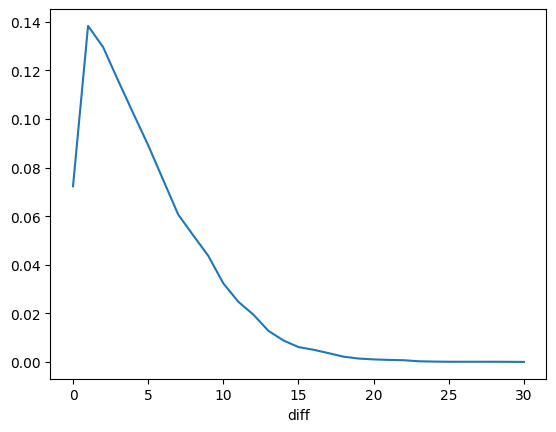

In [159]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [160]:

predictions

,actual,predicted,diff
DATE,,,
1985-02-04,29.0,30.968485,1.968485
1985-02-05,28.0,27.731545,0.268455
1985-02-06,29.0,33.702151,4.702151
1985-02-07,23.0,34.009886,11.009886
1985-02-08,29.0,27.811666,1.188334
...,...,...,...
2024-06-25,84.0,86.240248,2.240248
2024-06-26,87.0,82.344140,4.655860
2024-06-27,80.0,84.134225,4.134225
